This Code will be mainly used for the Capstone Project.

In [2]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Data Wrangling <a name="Data Wrangling"></a>

To convert the data from the initial format to a format that is better to analyze, we use the process of data wrangling.
So let´s read the data in its initial format provided by the Traffic DP of Seattle.

In [110]:
# Reading Data set using pandas 
file_path = "input/"
file_name = "Data-Collisions.csv"
df = pd.read_csv(file_path + file_name)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


To get an imagination with how many columns and rows we are dealing with we run the command:

In [111]:
df.shape

(194673, 38)

The DataFrame constists of 194673 rows and 38 columns. In the next step we check, if there are missing values in our Dataframe df

In [116]:
#missing_data = df.isnull()

#for column in missing_data.columns.values.tolist():
    #print(column)
    #print(missing_data[column].value_counts())
    #print("") 
print("Column\t\tmissing values")
print("------------------------")
df.isnull().sum()

Column		missing values
------------------------


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Based on the summary above, each column has 194673 rows of data, 19 out of 38 columns containing missing data. In the following the columns and their amount of missing data is listed. Since there are two methods to deal with missing data either by dropping columns and rows or by replacing them by mean, frequency or based on other functions, decisions will be made.

The columns containing missing values and their amount are:
<ol>
    <li>"X": 5334 missing data</li>
    <li>"Y": 5334 missing data</li>
    <li>"ADDRTYPE": 1926 missing data</li>
    <li>"INTKEY": 129603 missing data</li>
    <li>"LOCATION": 2677 missing data</li>
    <li>"EXCEPTRSNCODE": 109862 missing data</li>
    <li>"EXCEPTRSNDESC": 189035 missing data</li>
    <li>"COLLISIONTYPE": 4904 missing data</li>
    <li>"JUNCTIONTYPE": 6329 missing data</li>
    <li>"INATTENTIONIND": 164868 missing data</li>
    <li>"UNDERINFL": 4884 missing data</li>
    <li>"WEATHER": 5081 missing data</li>
    <li>"ROADCOND": 5012 missing data</li>
    <li>"LIGHTCOND": 5170 missing data</li>
    <li>"PEDROWNOTGRNT": 190006 missing data</li>
    <li>"SPEEDING": 185340 missing data</li>
    <li>"SDOTCOLNUM": 79737 missing data</li>
    <li>"ST_COLCODE": 18 missing data</li>
    <li>"ST_COLDESC": 4904 missing data</li>
    
</ol>

Whole columns should be dropped only if most entries in the column are empty or redundant in their provided information. 
The percentage of missing data in relation to the total amount of data can easily be determined. For example for the columns "INTKEY" we have around 66.6 % missing data as the following command shows:

In [77]:
df["INTKEY"].isnull().value_counts(normalize=True)

True     0.665747
False    0.334253
Name: INTKEY, dtype: float64

**Following columns will be dropped**
<ol>
<li>"INTKEY": 129603 missing values (~ 66.6 % missing data). (</li>
<li>"EXCEPTRSNCODE": 109862 missing values (~ 56.4 %).</li>
<li>"EXCEPTRSNDESC": 189035 missing values (~ 97.1 %).</li>
<li>"INATTENTIONIND": 164868 missing values (~84.7 %).</li>
<li>"PEDROWNOTGRNT": 190006 missing values (~ 97.6 %).</li>
<li>"SPEEDING": 185340 missing values (~ 95.2 %).</li>
<li>"SDOTCOLNUM": 79737 missing values (~ 40.9 %).</li>
<li>LOCATION": 2677 missing values (~ 1.4 %). This column will be dropped because it contains redundandant information which already exists in the columns X and Y.</li></ol>

In [78]:
# drop columns
df.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','SDOTCOLNUM','LOCATION'], axis=1, inplace=True)

The remaining columns have significantly fewer missing entries and are therefore treated differently. They all contain categorial data, where the most frequent one will be the replacement entry for the missing cells.

**Following columns will be replaced by frequency:**
<ol>
<li>"ADDRTYPE": 1926 missing values (~ 1.0 %). Values: "Block", "Intersection", "Alley"</li>
<li>"COLLISIONTYPE": 4904 missing values (~ 2.5 %).</li>
<li>"JUNCTIONTYPE": 6329 missing values (~ 3.5 %).</li>
<li>"UNDERINFL": 4884 missing values. (~ 2.5 %).</li>
<li>"WEATHER": 5081 missing values (~ 2.6 %).</li>
<li>"ROADCOND": 5012 missing values (~ 2.6 %).</li>
<li>"LIGHTCOND": 5170 missing values (~ 2.6 %).</li></ol>


In order to replace the missing entries with the most frequently occurring entry, this must be identified for each column. The methods *value_counts()* and *idxmax()* are used to determine the maximum number of unique values.  

In [92]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [94]:
print("The methods appended one after the other identifies -->", df["ADDRTYPE"].value_counts().idxmax(), "<-- as the most frequent value in ADDRTYPE")

The methods appended one after the other identifies --> Block <-- as the most frequent value in ADDRTYPE


The missing values in *ADDRTYPE* will now be replaced by

In [97]:
# replaces value in ADDRTYPE
df['ADDRTYPE'].replace(np.nan, 'Block', inplace=True)

In [98]:
df["ADDRTYPE"].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

As expected, the number of the entry "Block" was added by 1926 missing values.
The same methodology is now applied to the remaining columns.

In [102]:
replace_value = df.COLLISIONTYPE.value_counts().idxmax()
df['COLLISIONTYPE'].replace(np.nan, replace_value, inplace=True)

replace_value = df.JUNCTIONTYPE.value_counts().idxmax()
df['JUNCTIONTYPE'].replace(np.nan, replace_value, inplace=True)

replace_value = df.UNDERINFL.value_counts().idxmax()
df['UNDERINFL'].replace(np.nan, replace_value, inplace=True)

replace_value = df.WEATHER.value_counts().idxmax()
df['WEATHER'].replace(np.nan, replace_value, inplace=True)

replace_value = df.ROADCOND.value_counts().idxmax()
df['ROADCOND'].replace(np.nan, replace_value, inplace=True)

replace_value = df.LIGHTCOND.value_counts().idxmax()
df['LIGHTCOND'].replace(np.nan, replace_value, inplace=True)

<AxesSubplot:>

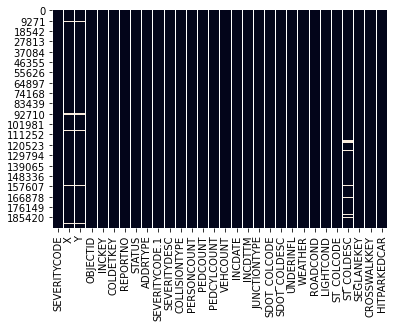

In [106]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [105]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [108]:
df.isnull().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE             0
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE        0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE         0
SDOT_COLCODE         0
SDOT_COLDESC         0
UNDERINFL            0
WEATHER              0
ROADCOND             0
LIGHTCOND            0
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64